In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

'''yfinance就是爬雅虎财经的库，https://pypi.org/project/yfinance/'''

data = yf.download(tickers = ('BILI'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
'''bilibili'''

df = pd.DataFrame(data)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-19,127.690002,134.279999,126.370003,127.879997,7757100
2021-01-20,134.300003,137.347000,127.330002,127.800003,6129800
2021-01-21,129.149994,130.500000,121.764999,123.879997,5942300
2021-01-22,123.470001,134.070007,122.800003,133.750000,6806500
2021-01-25,142.550003,144.460007,129.429993,134.270004,8581200
...,...,...,...,...,...
2022-01-11,40.099998,42.314999,39.820000,41.860001,7218800
2022-01-12,43.708000,44.450001,40.439999,41.700001,6644000
2022-01-13,40.290001,40.959999,37.029999,37.240002,7883700


In [2]:
## Simple Moving Average (SMA) for 20 days
'''rolling滑动窗口，取平均时前后没有数据会自动改变数据，Dataframe.rolling.mean()'''
df['SMA'] = df.Close.rolling(window=25).mean()

## standard deviations for 20 days
'''标准差 dataframe.rolling.std()'''
df['stddev'] = df.Close.rolling(window=25).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
'''平均值 加减 标准差'''

'''I have tried other number, but 2 is better, so I did not change this parameter.'''
df['Upper'] = df.SMA + 2 * df.stddev
df['Lower'] = df.SMA - 2 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
'''买卖策略'''
'''满足条件TRUE，否则FALSE'''
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-02-23,125.300003,129.970001,114.980003,129.259995,9044200,135.141999,11.402444,157.946888,112.337110,False,False
2021-02-24,126.699997,128.649994,118.830002,127.139999,6652100,135.112399,11.423024,157.958446,112.266352,False,False
2021-02-25,140.690002,147.710007,130.399994,131.839996,18432300,135.273999,11.343566,157.961131,112.586867,False,False
2021-02-26,132.039993,136.089996,121.089996,125.970001,9150000,135.357599,11.263514,157.884628,112.830570,False,False
2021-03-01,132.949997,145.490005,130.531998,144.669998,8027200,135.794399,11.409369,158.613137,112.975661,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-11,40.099998,42.314999,39.820000,41.860001,7218800,47.779200,7.047972,61.875145,33.683256,False,False
2022-01-12,43.708000,44.450001,40.439999,41.700001,6644000,47.000800,6.566763,60.134327,33.867274,False,False
2022-01-13,40.290001,40.959999,37.029999,37.240002,7883700,46.069600,6.210754,58.491109,33.648092,False,False


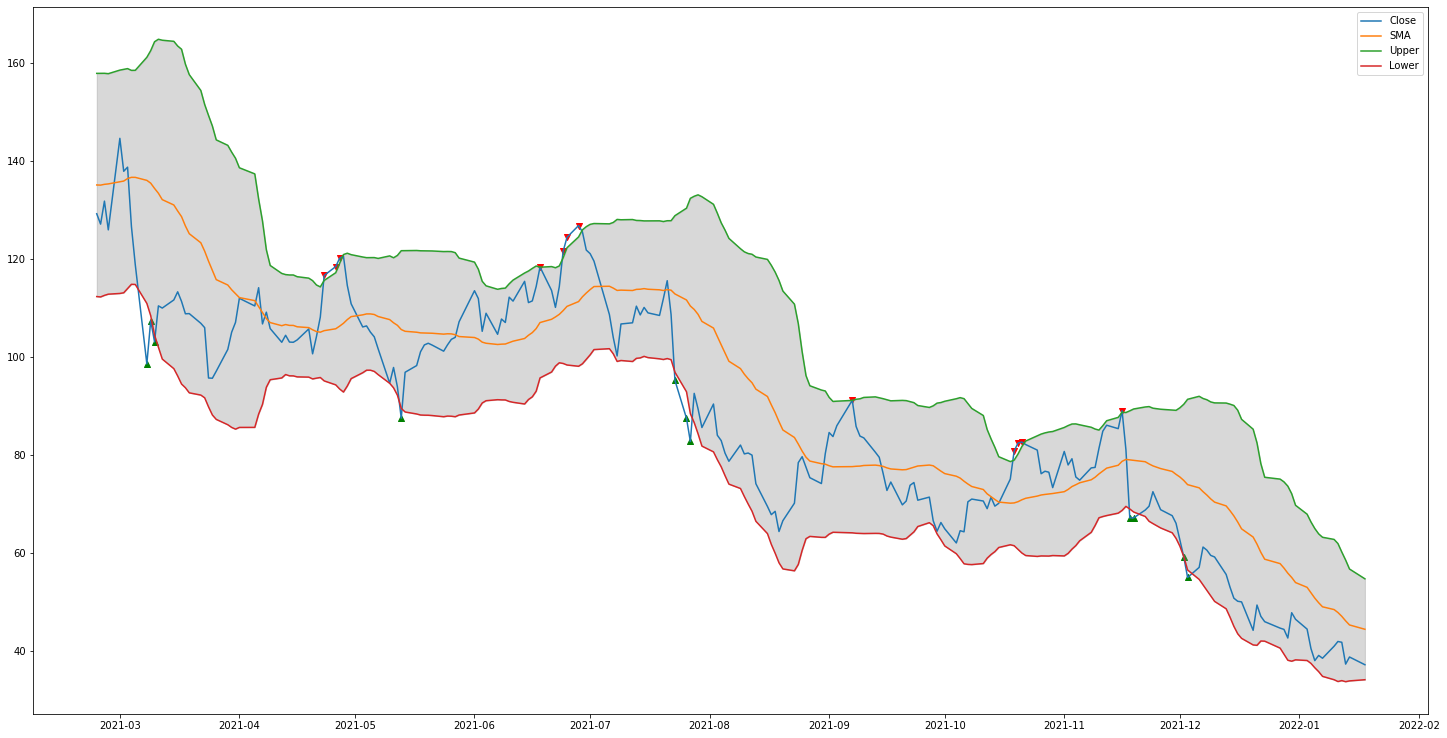

In [3]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization画点

plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend图例
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

In [4]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            
            sell.append(i)
            stock_on_hand = False

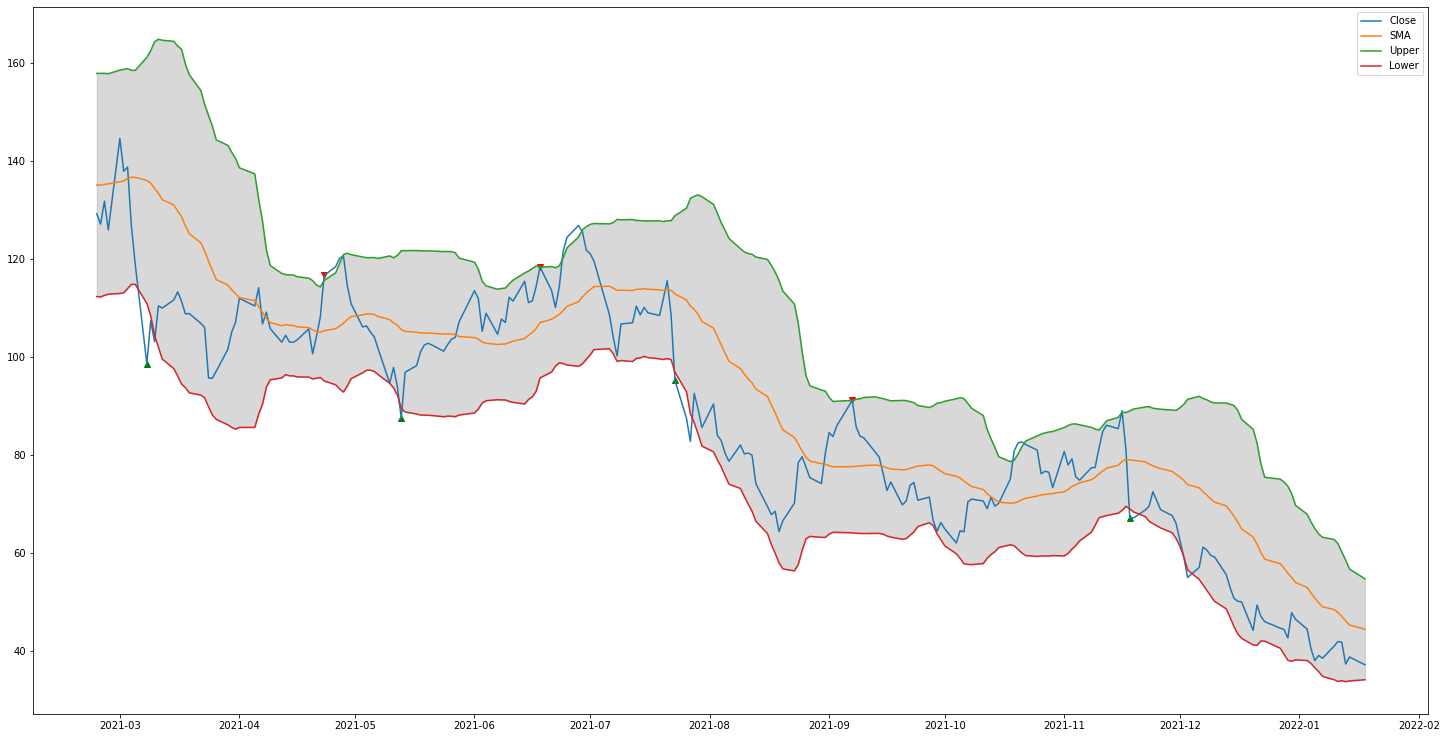

In [5]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

In [6]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

44890.00701904297